### Sentimental Analysis of Amazon Customer Reviews.


# Data Scraping from Amazon
### Here we are scraping the reviews from amazon to perform sentiment analysis on them


In [1]:
# use this to install selenium
#pip install selenium

In [2]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score
import gensim
import seaborn as sns
from gensim.models import Word2Vec
from gensim.test.utils import datapath
import spacy
import pandas as pd
import numpy as np
import time
import os
import re

In [ ]:
chrome_drive_exe_path = '' # Enter path for your chromedriver.exe
s = Service(chrome_drive_exe_path)
myoptions = Options()
driver = Chrome(service=s, options=myoptions) 
driver.maximize_window()
amazon_cod_mwf_two = 'https://www.amazon.com/Call-Duty-Modern-Warfare-Playstation-3/product-reviews/B00269QLI8/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
driver.get(amazon_cod_mwf_two)   
driver.implicitly_wait(10)

In [11]:
review_list = []
username_list = []
ratting = []
def scrap_reviews():
    reviews_data = driver.find_elements(By.ID,'cm_cr-review_list')
    review_data = reviews_data[0]
    reviews = review_data.find_elements(By.CLASS_NAME,'review-text')
    usernames = review_data.find_elements(By.CLASS_NAME,'a-profile-name')
    stars = review_data.find_elements(By.CLASS_NAME,'a-icon-alt')
    for review, username, star in zip(reviews, usernames, stars):
        review_list.append(review.text)
        username_list.append(username.text)
        ratting.append(star.get_property("innerHTML")[0])

In [12]:
while(True):  
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME, 'a-last'))) 
        try:    
            try:
                driver.find_element(By.XPATH,"//a[@data-hook='cr-translate-these-reviews-link']").click()
            except:
                print('Translate button not found')
            scrap_reviews()
            time.sleep(2)
            driver.find_element(By.CLASS_NAME, 'a-last').click()
            time.sleep(2)
            print("click done \n")
            try:
                driver.find_element(By.CLASS_NAME, 'a-disabled')
                break
            except:
                print("Countinue")
        except:
            print('Something is wrong')
            break

print("Successfully, reached on the last page")

Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Countinue
Translate button not found
click done 

Successfully, reached on the last page


In [13]:
driver.quit()
len(username_list)

160

In [ ]:
data = {'Username':username_list, 'Review': review_list, 'Ratting': ratting}
df = pd.DataFrame(data, columns=['Username', 'Review', 'Ratting'])
df

### Save the dataset 

In [10]:
#Enter path where you want to save you csv file.
#df.to_csv (r'C:\Users\export_dataframe.csv', index = False, header=True)
df = pd.read_csv(r'C:\Users\export_dataframe.csv')
df.head(5)


,Username,Review,Ratting,1st Analysis
0,David E. Johnson Jr.,Thank you very much,5,1
1,Christian J. Gaston,Great quality!,5,1
2,Candiria drummer,Game arrived quick and like new condition than...,5,1
3,Melissa Baldwin,Great!,5,1
4,AmazonBuyerAnon,If you own an Xbox 360 or later this is an abs...,5,1


### Corpus Generation

In [11]:
mask = (df['Ratting'] > 3)
mask

0       True
1       True
2       True
3       True
4       True
       ...  
155     True
156     True
157    False
158    False
159    False
Name: Ratting, Length: 160, dtype: bool

In [12]:
df['2nd Analysis'] = [0 if i == False else 1 for i in mask]
df

,Username,Review,Ratting,1st Analysis,2nd Analysis
0,David E. Johnson Jr.,Thank you very much,5,1,1
1,Christian J. Gaston,Great quality!,5,1,1
2,Candiria drummer,Game arrived quick and like new condition than...,5,1,1
3,Melissa Baldwin,Great!,5,1,1
4,AmazonBuyerAnon,If you own an Xbox 360 or later this is an abs...,5,1,1
...,...,...,...,...,...
155,kei,"After all, if it's not an English voice, you w...",5,1,1
156,Vlidge,It surpasses the previous game in every way!! ...,5,1,1
157,yuu,"Compared to the previous game, there is no phy...",2,0,0
158,むか,COD4 is more fun online.\nOr rather online is ...,1,0,0


In [13]:
masks = [True if len(i) < 385 else False for i in df['Review']]
df = df[masks]
df

,Username,Review,Ratting,1st Analysis,2nd Analysis
0,David E. Johnson Jr.,Thank you very much,5,1,1
1,Christian J. Gaston,Great quality!,5,1,1
2,Candiria drummer,Game arrived quick and like new condition than...,5,1,1
3,Melissa Baldwin,Great!,5,1,1
4,AmazonBuyerAnon,If you own an Xbox 360 or later this is an abs...,5,1,1
...,...,...,...,...,...
152,父,I feel like it was interesting.\nIs it said th...,2,0,0
154,ローチ,"I really didn't like dubbing, so I bought the ...",5,1,1
156,Vlidge,It surpasses the previous game in every way!! ...,5,1,1
158,むか,COD4 is more fun online.\nOr rather online is ...,1,0,0


In [14]:
mask = (df['1st Analysis'] != df['2nd Analysis'])
mask

0      False
1      False
2      False
3      False
4      False
       ...  
152    False
154    False
156    False
158    False
159    False
Length: 143, dtype: bool

In [15]:
df['Conflict'] = [0 if i == False else 1 for i in mask]

C:\Users\PAVILI~1\AppData\Local\Temp/ipykernel_9280/3235348247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conflict'] = [0 if i == False else 1 for i in mask]


In [16]:
count_yes = 0
count_no = 0
for review in df.Review:
    if 'broken'in review:
        count_yes += 1
    elif "didn't work" in review:
        count_yes += 1
    elif 'unreadable' in review:
        count_yes += 1
    elif 'fake' in review:
        count_yes += 1
    elif 'return' in review:
        count_yes += 1
    elif "didn't like" in review:
        count_yes += 1
    else:
        count_no +=1
print('count_yes ',count_yes,'\ncount_no ',count_no)        


count_yes  14 
count_no  129


In [17]:
df[df['1st Analysis'] != df['2nd Analysis']]

,Username,Review,Ratting,1st Analysis,2nd Analysis,Conflict
94,Amazon Customer,It came earlier than was scheduled! Great (Y),3,1,0,1


In [18]:
df['Conclusion'] = df['1st Analysis']

C:\Users\PAVILI~1\AppData\Local\Temp/ipykernel_9280/3506062079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Conclusion'] = df['1st Analysis']


In [19]:
df

,Username,Review,Ratting,1st Analysis,2nd Analysis,Conflict,Conclusion
0,David E. Johnson Jr.,Thank you very much,5,1,1,0,1
1,Christian J. Gaston,Great quality!,5,1,1,0,1
2,Candiria drummer,Game arrived quick and like new condition than...,5,1,1,0,1
3,Melissa Baldwin,Great!,5,1,1,0,1
4,AmazonBuyerAnon,If you own an Xbox 360 or later this is an abs...,5,1,1,0,1
...,...,...,...,...,...,...,...
152,父,I feel like it was interesting.\nIs it said th...,2,0,0,0,0
154,ローチ,"I really didn't like dubbing, so I bought the ...",5,1,1,0,1
156,Vlidge,It surpasses the previous game in every way!! ...,5,1,1,0,1
158,むか,COD4 is more fun online.\nOr rather online is ...,1,0,0,0,0


### Calculating Kappa Score

In [20]:
cohen_kappa_score(df['1st Analysis'],df['2nd Analysis'])

0.9791636310651318

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Hate Speach Detection using Kaggle dataset


In [21]:
import neattext.functions as nfx

In [22]:
df = pd.read_csv(r'C:\Users\Pavilion14x360\Dataset for hate speach Final Term\data.csv')
df.head(5)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [23]:
df.shape

(31962, 3)

In [24]:
df[df['label'] == 0].shape

(29720, 3)

In [25]:
df[df['label'] == 1].shape

(2242, 3)

In [26]:
df['Clean_Text'] = df['tweet'].apply(nfx.remove_userhandles)

In [27]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [28]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emojis)

In [29]:
df.drop("tweet", axis='columns',inplace=True)

In [30]:
df_new = df[0:5000]

In [31]:
df_new.shape

(5000, 3)

### Feature Analysis

In [32]:
X = np.array(df_new['Clean_Text'])
y = np.array(df_new['label'])

In [33]:
X[1]

"thanks #lyft credit can't use cause offer wheelchair vans pdx. #disapointed #getthanked"

In [34]:
X

array(['father dysfunctional selfish drags kids dysfunction. #run',
       "thanks #lyft credit can't use cause offer wheelchair vans pdx. #disapointed #getthanked",
       'bihday majesty', ...,
       '3 apps help &amp; #healthy ð\x9f\x99\x8cð\x9f\x8f½ð\x9f\x93±ð\x9f\x92\x96 #blogginggals',
       '#bestsellers #top10 #sales "never bed #dream wakeup #hope"',
       'reaction volatile situation thought, punch youð\x9f\x98 ð\x9f\x98 #stupiditysucks #quietpeoplearealwaysthoughtweak'],
      dtype=object)

#### Splite data text and labels into train & test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
len(X_test)

1500

#### Get the unigram features from data

In [37]:
countVector = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(1,1)).fit(X)
X_train_vectorized = countVector.transform(X_train).toarray() #feature matrix is generated
X_test_vectorized = countVector.transform(X_test).toarray()

In [38]:
X_train_vectorized[0] 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Train Naive Bayes Model with Unigram Features

In [39]:
precisions = {}

In [40]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_vectorized, y_train)
testPredictionsnaivebayes = naivebayes.predict(X_test_vectorized)

#### Print the precision recall and fscore for naive bayes Unigram

In [41]:
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayes, average='macro'))
a = precision_recall_fscore_support(y_test,testPredictionsnaivebayes, average='macro')

Macro: (0.6744897179114746, 0.6881063869638508, 0.6809638137261264, None)


In [42]:
score = precision_recall_fscore_support(y_test,testPredictionsnaivebayes, average='macro')[0]
precisions['NB Unigram'] = score

### Train SVM model with Unigram

In [43]:
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)
testPredictionsSVM = svm.predict(X_test_vectorized)

#### Print the precision recall and fscore for SVM (Unigram)

In [44]:
score = precision_recall_fscore_support(y_test,testPredictionsSVM, average='macro')[0]
precisions['SVM Unigram'] = score
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVM, average='macro'))

Macro: (0.8446052217678515, 0.7051882374976588, 0.7543859649122807, None)


### Get the bigram features from data

In [45]:
countVector = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(2,2)).fit(X)
X_train_vectorized_bigram = countVector.transform(X_train).toarray()
X_test_vectorized_bigram = countVector.transform(X_test).toarray()

#### Train Naive Bayes Model with bigram features

In [46]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_vectorized_bigram, y_train)
testPredictionsnaivebayesbigram = naivebayes.predict(X_test_vectorized_bigram)

#### Print the precision recall and fscore for naive bayes (Bigram)

In [47]:
score = precision_recall_fscore_support(y_test,testPredictionsnaivebayesbigram, average='macro')[0]
precisions['NB Bigram'] = score
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayesbigram, average='macro'))

Macro: (0.5441207499397155, 0.6754635699569207, 0.37477471864862344, None)


### Train SVM model with Bigram

In [48]:
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized_bigram, y_train)
testPredictionsSVMBigram = svm.predict(X_test_vectorized_bigram)

#### Print the precision recall and fscore for SVM (Bigram)

In [49]:
score = precision_recall_fscore_support(y_test,testPredictionsSVMBigram, average='macro')[0]
precisions['SVM Bigram'] = score
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVMBigram, average='macro'))

Macro: (0.9708445040214477, 0.5421052631578948, 0.5626543696023003, None)


### Get the trigram features from data

In [50]:
countVector = CountVectorizer(input='content',decode_error='ignore',analyzer='word', binary=False, ngram_range=(3,3)).fit(X)
X_train_vectorized_trigram = countVector.transform(X_train).toarray()
X_test_vectorized_trigram = countVector.transform(X_test).toarray()

#### Train Naive Bayes Model with trigram features

In [51]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_vectorized_trigram, y_train)
testPredictionsnaivebayestrigram = naivebayes.predict(X_test_vectorized_trigram)

#### Print the precision recall and fscore for naive bayes (trigram)

In [52]:
score = precision_recall_fscore_support(y_test,testPredictionsnaivebayestrigram, average='macro')[0]
precisions['NB Trigram'] = score
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayestrigram, average='macro'))

Macro: (0.5359304084720121, 0.5633451957295373, 0.17948777389973122, None)


### Train SVM model with trigram

In [53]:
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized_trigram, y_train)
testPredictionsSVMTrigram = svm.predict(X_test_vectorized_trigram)

#### Print the precision recall and fscore for SVM (trigram)

In [54]:
score = precision_recall_fscore_support(y_test,testPredictionsSVMTrigram, average='macro')[0]
precisions['SVM Trigram'] = score
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVMTrigram, average='macro'))

Macro: (0.97052913596785, 0.5368421052631579, 0.55344456623229, None)


In [55]:
scores = {
        'Feature':['Unigram','Bigram','Trigram'],
    "Naive Bayes": [0.65,0.39,0.21],
    "SVM":[0.69,0.56,0.56]
}

df_score = pd.DataFrame(scores)
df_score

,Feature,Naive Bayes,SVM
0,Unigram,0.65,0.69
1,Bigram,0.39,0.56
2,Trigram,0.21,0.56


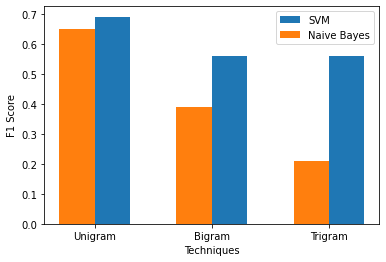

In [56]:
from matplotlib import pyplot as plt
Feature = ['Unigram','Bigram','Trigram']
NaiveBayes = [0.65,0.39,0.21]
SVM = [0.69,0.56,0.56]

fig, ax = plt.subplots()
index = np.arange(len(Feature))
ax.bar(x=index+0.3,height=SVM,width=0.3,label='SVM')
ax.bar(x=index,height=NaiveBayes,width=0.3, label='Naive Bayes')


ax.set_xlabel('Techniques')
ax.set_ylabel('F1 Score')

plt.legend()

plt.xticks(ticks=index+0.15,labels=Feature)


plt.savefig("fig1.png")
plt.show()

### Get the TF-IDF features from data

In [57]:
vectorizer = TfidfVectorizer()
X_Train = vectorizer.fit_transform(X).toarray()

In [58]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_Train, y, test_size=0.3)

In [59]:
vectorizer

TfidfVectorizer()

### Train Naive Bayes Model with TF-IDF features

In [60]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_tfidf, y_train_tfidf)
testPredictionsnaivebayestfidf = naivebayes.predict(X_test_tfidf)

In [61]:
score = precision_recall_fscore_support(y_test,testPredictionsnaivebayestfidf, average='macro')[0]
precisions['NB TF-IDF'] = score
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayestfidf, average='macro'))

Macro: (0.48563834347937923, 0.48368608353624276, 0.48455777160649666, None)


### Train SVM model with TF-IDF

In [62]:
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train_tfidf)
testPredictionsSVMTfidf = svm.predict(X_test_tfidf)

In [63]:
score = precision_recall_fscore_support(y_test,testPredictionsSVMTfidf, average='macro')[0]
precisions['SVM TF-IDF'] = score
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVMTfidf, average='macro'))

Macro: (0.4920312952767314, 0.49814572017231695, 0.4888564732890143, None)


### Create Word2Vec Embeddings

In [64]:
df_new

,id,label,Clean_Text
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks #lyft credit can't use cause offer whee...
2,3,0,bihday majesty
3,4,0,#model love u u time urð±!!! ðððð...
4,5,0,factsguide: society #motivation
...,...,...,...
4995,4996,0,"attack lgbt community, america well. isolated/..."
4996,4997,0,looking forward catching there? designer lucky...
4997,4998,0,3 apps help &amp; #healthy ðð½ð±ð #b...
4998,4999,0,"#bestsellers #top10 #sales ""never bed #dream w..."


In [65]:
df_w2v = df_new.copy() 
X_train_df = pd.DataFrame(X_train, columns = ['Clean_Text'])
X_test_df = pd.DataFrame(X_test, columns = ['Clean_Text'])

def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]

df_w2v["tokens"] = df_w2v["Clean_Text"].apply(tokenizer)
X_train_df["tokens"] = X_train_df["Clean_Text"].apply(tokenizer)
X_test_df["tokens"] = X_test_df["Clean_Text"].apply(tokenizer)

In [66]:
model_word2vec = gensim.models.Word2Vec(sentences=df_w2v["tokens"], vector_size=300, sg=1, window=5, workers=10, min_count = 1)

In [67]:
def get_sent_vec(size,sent,model):
    vec = np.zeros(size).reshape(1,size)
    for word in sent:
        try:
            vec += model.wv[word].reshape(1,size)
        except:
            continue
    return vec

In [68]:
def get_train_test_vec(X_train, X_test, model_word2vec):
    train_vec = np.concatenate([get_sent_vec(300, sent, model_word2vec) for sent in X_train_df['tokens']])
    test_vec = np.concatenate([get_sent_vec(300, sent, model_word2vec) for sent in X_test_df['tokens']])
    return train_vec,test_vec

In [69]:
train_vec,test_vec = get_train_test_vec(X_train,X_test,model_word2vec)

### Train Naive Bayes Model with Word2Vec Embeddings

In [70]:
naivebayes = GaussianNB()
naivebayes.fit(train_vec, y_train)
testPredictionsnaivebayesWord2Vec = naivebayes.predict(test_vec)

In [71]:
score = precision_recall_fscore_support(y_test,testPredictionsnaivebayesWord2Vec, average='macro')[0]
precisions['NB W2V'] = score
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsnaivebayesWord2Vec, average='macro'))

Macro: (0.5145, 0.5543172878816257, 0.31758530183727035, None)


### Train SVM model with Word2Vec Embeddings

In [72]:
svm = SVC(kernel='linear')
svm.fit(train_vec, y_train)
testPredictionsSVMWord2Vec = svm.predict(test_vec)

In [73]:
score = precision_recall_fscore_support(y_test,testPredictionsSVMWord2Vec, average='macro')[0]
precisions['SVM W2V'] = score
print ("Macro:",precision_recall_fscore_support(y_test,testPredictionsSVMWord2Vec, average='macro'))

Macro: (0.4683333333333333, 0.5, 0.4836488812392427, None)


C:\Users\Pavilion14x360\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pavilion14x360\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
df_precision = pd.DataFrame(precisions.items(), columns=['Algorithm', 'Precision'])
df_precision

,Algorithm,Precision
0,NB Unigram,0.674490
1,SVM Unigram,0.844605
2,NB Bigram,0.544121
3,SVM Bigram,0.970845
4,NB Trigram,0.535930
5,SVM Trigram,0.970529
6,NB TF-IDF,0.485638
7,SVM TF-IDF,0.492031
8,NB W2V,0.514500
9,SVM W2V,0.468333


### Comparison of Precision of different algorithms

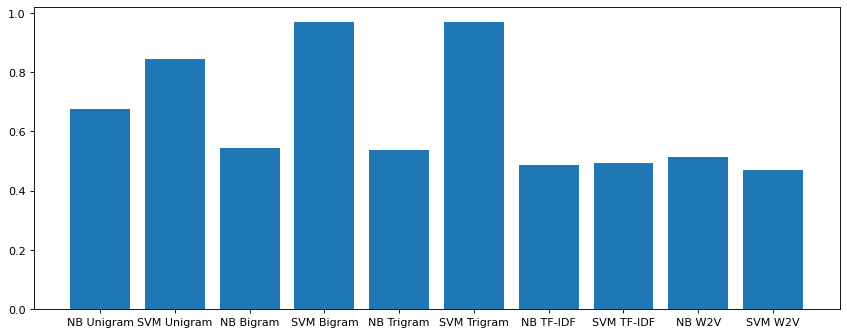

In [75]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(13, 5), dpi=80)

algorithm = list(precisions.keys())
precision = list(precisions.values())

plt.bar(range(len(precisions)), precision, tick_label=algorithm)
plt.show()

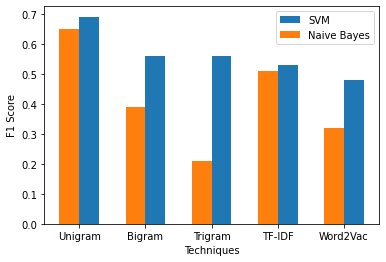

In [76]:
from matplotlib import pyplot as plt
Feature = ['Unigram','Bigram','Trigram','TF-IDF','Word2Vac']
NaiveBayes = [0.65,0.39,0.21,0.51,0.32]
SVM = [0.69,0.56,0.56,0.53,0.48]

fig, ax = plt.subplots()
index = np.arange(len(Feature))
ax.bar(x=index+0.3,height=SVM,width=0.3,label='SVM')
ax.bar(x=index,height=NaiveBayes,width=0.3, label='Naive Bayes')


ax.set_xlabel('Techniques')
ax.set_ylabel('F1 Score')

plt.legend()

plt.xticks(ticks=index+0.15,labels=Feature)


plt.savefig("fig2.png")
plt.show()